In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [2]:
df = pd.read_csv("final_economic_data.csv")

df_total = df[df["Municipality"] == "TOTAL"] # I'll analyse regions

df_total = df_total[(df_total["Year"] >= 2010) & (df_total["Year"] <= 2022)] #no imports/exports

In [3]:
#Predicting GDP

#region specific feature sets

region_features = {
    1: [
        "Gross value added (millions of euro), G Wholesale and retail trade; repair of motor vehicles and motorcycles (45-47)",
        "Gross value added (millions of euro), O Public administration and defence; compulsory social security (84)",
        "Employed (PT)",
        "Inhabitants, total (PT)",
        "Wages and salaries received, income",
    ],
    2: [
        "Gross value added (millions of euro), F Construction (41-43)",
        "Gross value added (millions of euro), H Transportation and storage (49-53)",
        "Gross value added (millions of euro), O Public administration and defence; compulsory social security (84)",
        "Gross value added (millions of euro), P Education (85)",
        "Gross value added (millions of euro), A Agriculture, forestry and fishing (01-03)",
        "Exports (euro)",
        "Employed (PT)",
        "Wages and salaries received, income",
    ],
    4: [
        "Gross value added (millions of euro), F Construction (41-43)",
        "Gross value added (millions of euro), G Wholesale and retail trade; repair of motor vehicles and motorcycles (45-47)",
        "Gross value added (millions of euro), H Transportation and storage (49-53)",
        "Gross value added (millions of euro), O Public administration and defence; compulsory social security (84)",
        "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
        "Gross value added (millions of euro), A Agriculture, forestry and fishing (01-03)",
        "Inhabitants, total (PT)",
        "Disposable income, net",
    ],
    5: [
        "Gross value added (millions of euro), O Public administration and defence; compulsory social security (84)",
        "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
        "Imports (euro)",
    ],
    6: [
        "Gross value added (millions of euro), F Construction (41-43)",
        "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
        "Imports (euro)",
        "Wages and salaries received, income",
    ],
    7: [
        "Gross value added (millions of euro), G Wholesale and retail trade; repair of motor vehicles and motorcycles (45-47)",
        "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
        "Imports (euro)",
        "Exports (euro)",
    ],
    8: [
        "Gross value added (millions of euro), F Construction (41-43)",
        "Gross value added (millions of euro), G Wholesale and retail trade; repair of motor vehicles and motorcycles (45-47)",
        "Gross value added (millions of euro), O Public administration and defence; compulsory social security (84)",
        "Gross value added (millions of euro), P Education (85)",
        "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
        "Gross value added (millions of euro), A Agriculture, forestry and fishing (01-03)",
        "Exports (euro)",
        "Inhabitants, total (PT)",
    ],
    9: [
        "Gross value added (millions of euro), P Education (85)",
        "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
        "Exports (euro)",
        "Employed (PT)",
        "Inhabitants, total (PT)",
        "Disposable income, net",
    ],
    10: [
        "Gross value added (millions of euro), H Transportation and storage (49-53)",
        "Gross value added (millions of euro), O Public administration and defence; compulsory social security (84)",
        "Gross value added (millions of euro), P Education (85)",
        "Imports (euro)",
        "Disposable income, net",
        "Wages and salaries received, income",
    ],
    11: [
        "Gross value added (millions of euro), G Wholesale and retail trade; repair of motor vehicles and motorcycles (45-47)",
        "Gross value added (millions of euro), H Transportation and storage (49-53)",
        "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
        "Gross value added (millions of euro), A Agriculture, forestry and fishing (01-03)",
        "Exports (euro)",
        "Disposable income, net",
    ],
    12: [
        "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
        "Gross value added (millions of euro), A Agriculture, forestry and fishing (01-03)",
        "Exports (euro)",
        "Employed (PT)",
        "Disposable income, net",
    ],
    13: [
        "Gross value added (millions of euro), G Wholesale and retail trade; repair of motor vehicles and motorcycles (45-47)",
        "Gross value added (millions of euro), O Public administration and defence; compulsory social security (84)",
        "Gross value added (millions of euro), P Education (85)",
        "Exports (euro)",
        "Employed (PT)",
    ],
    14: [
        "Gross value added (millions of euro), F Construction (41-43)",
        "Gross value added (millions of euro), H Transportation and storage (49-53)",
        "Gross value added (millions of euro), P Education (85)",
        "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
        "Gross value added (millions of euro), A Agriculture, forestry and fishing (01-03)",
        "Imports (euro)",
        "Exports (euro)",
    ],
    15: [
        "Gross value added (millions of euro), H Transportation and storage (49-53)",
        "Gross value added (millions of euro), P Education (85)",
        "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
        "Exports (euro)",
        "Employed (PT)",
        "Disposable income, net",
    ],
    16: [
        "Gross value added (millions of euro), F Construction (41-43)",
        "Gross value added (millions of euro), H Transportation and storage (49-53)",
        "Gross value added (millions of euro), O Public administration and defence; compulsory social security (84)",
        "Gross value added (millions of euro), P Education (85)",
        "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
        "Employed (PT)",
        "Inhabitants, total (PT)",
        "Disposable income, net",
    ],
    17: [
        "Exports (euro)",
        "Gross value added (millions of euro), G Wholesale and retail trade; repair of motor vehicles and motorcycles (45-47)",
        "Gross value added (millions of euro), K Financial and insurance activities (64-66)",
        "Employed (PT)",
        "Disposable income, net",
    ],
    18: [
        "Gross value added (millions of euro), H Transportation and storage (49-53)",
        "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
        "Gross value added (millions of euro), A Agriculture, forestry and fishing (01-03)",
        "Imports (euro)",
        "Exports (euro)",
    ],
    19: [
        "Gross value added (millions of euro), F Construction (41-43)",
        "Gross value added (millions of euro), G Wholesale and retail trade; repair of motor vehicles and motorcycles (45-47)",
        "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
        "Wages and salaries received, income",
    ],
    21: [
    "Exports (euro)",
    "Gross value added (millions of euro), G Wholesale and retail trade; repair of motor vehicles and motorcycles (45-47)",
    "Gross value added (millions of euro), H Transportation and storage (49-53)",
    "Gross value added (millions of euro), K Financial and insurance activities (64-66)",
    "Wages and salaries received, income",
    ],
}

target_col = "GDP per capita (euro at current prices)"

regions = df_total["Region"].unique()


Region 1
cols_features = [
    "Gross value added (millions of euro), G Wholesale and retail trade; repair of motor vehicles and motorcycles (45-47)",
    "Gross value added (millions of euro), O Public administration and defence; compulsory social security (84)",
    "Employed (PT)",
    "Inhabitants, total (PT)",
    "Wages and salaries received, income",
]
Region 1 - Train R²: 0.9895384587019801
Region 1 - Test  R²: 0.9980094107788313


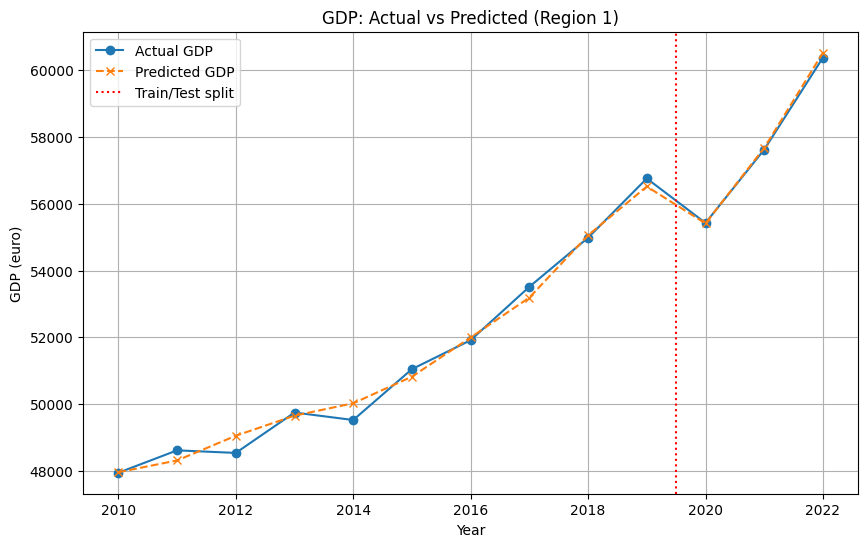


Region 2
cols_features = [
    "Gross value added (millions of euro), F Construction (41-43)",
    "Gross value added (millions of euro), H Transportation and storage (49-53)",
    "Gross value added (millions of euro), O Public administration and defence; compulsory social security (84)",
    "Gross value added (millions of euro), P Education (85)",
    "Gross value added (millions of euro), A Agriculture, forestry and fishing (01-03)",
    "Exports (euro)",
    "Employed (PT)",
    "Wages and salaries received, income",
]
Region 2 - Train R²: 0.9883597132218361
Region 2 - Test  R²: 0.9535319773868709


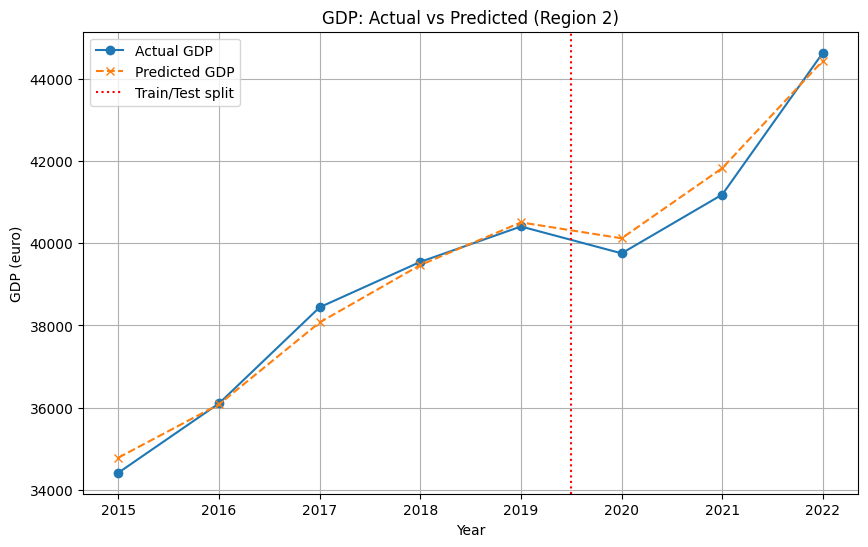


Region 4
cols_features = [
    "Gross value added (millions of euro), F Construction (41-43)",
    "Gross value added (millions of euro), G Wholesale and retail trade; repair of motor vehicles and motorcycles (45-47)",
    "Gross value added (millions of euro), H Transportation and storage (49-53)",
    "Gross value added (millions of euro), O Public administration and defence; compulsory social security (84)",
    "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
    "Gross value added (millions of euro), A Agriculture, forestry and fishing (01-03)",
    "Inhabitants, total (PT)",
    "Disposable income, net",
]
Region 4 - Train R²: 0.9597352360618723
Region 4 - Test  R²: 0.8608198192901768


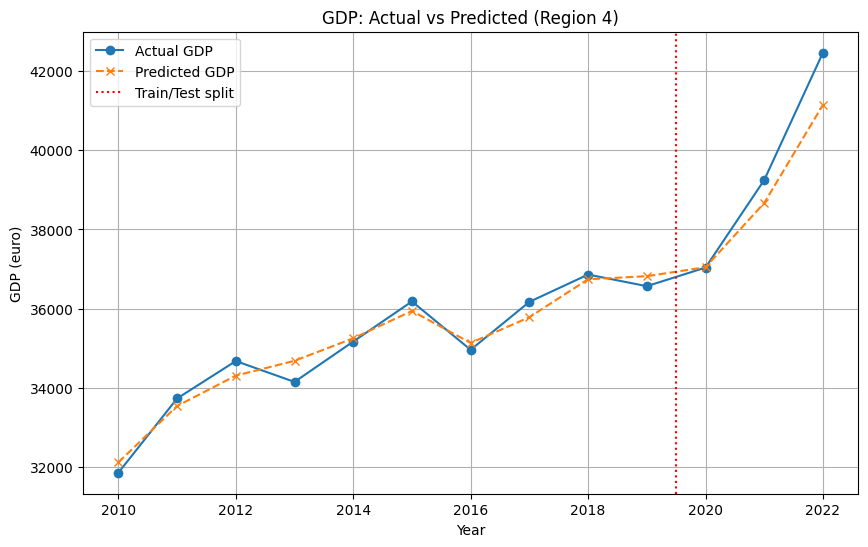


Region 5
cols_features = [
    "Gross value added (millions of euro), O Public administration and defence; compulsory social security (84)",
    "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
    "Imports (euro)",
]
Region 5 - Train R²: 0.9255674819331814
Region 5 - Test  R²: 0.9149905533020916


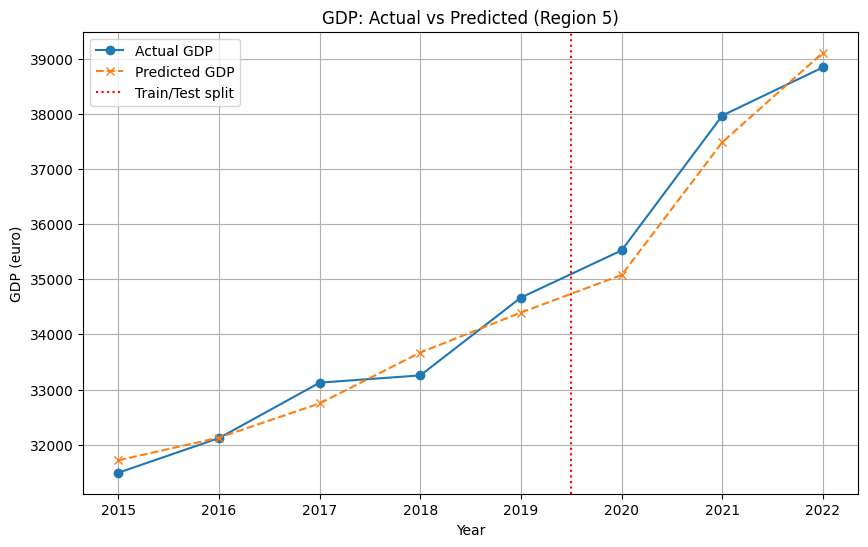


Region 6
cols_features = [
    "Gross value added (millions of euro), F Construction (41-43)",
    "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
    "Imports (euro)",
    "Wages and salaries received, income",
]
Region 6 - Train R²: 0.9950663414678731
Region 6 - Test  R²: 0.999802782123632


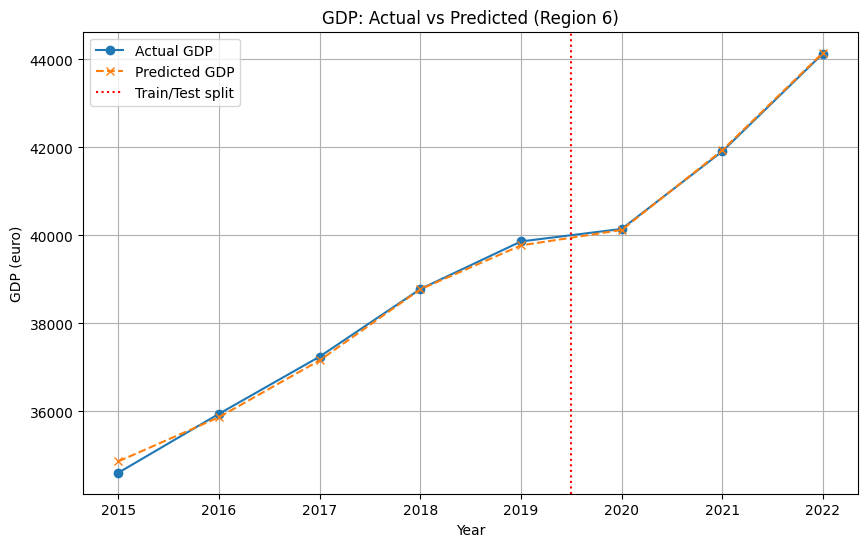


Region 7
cols_features = [
    "Gross value added (millions of euro), G Wholesale and retail trade; repair of motor vehicles and motorcycles (45-47)",
    "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
    "Imports (euro)",
    "Exports (euro)",
]
Region 7 - Train R²: 0.9669339302928855
Region 7 - Test  R²: 0.9476699547284664


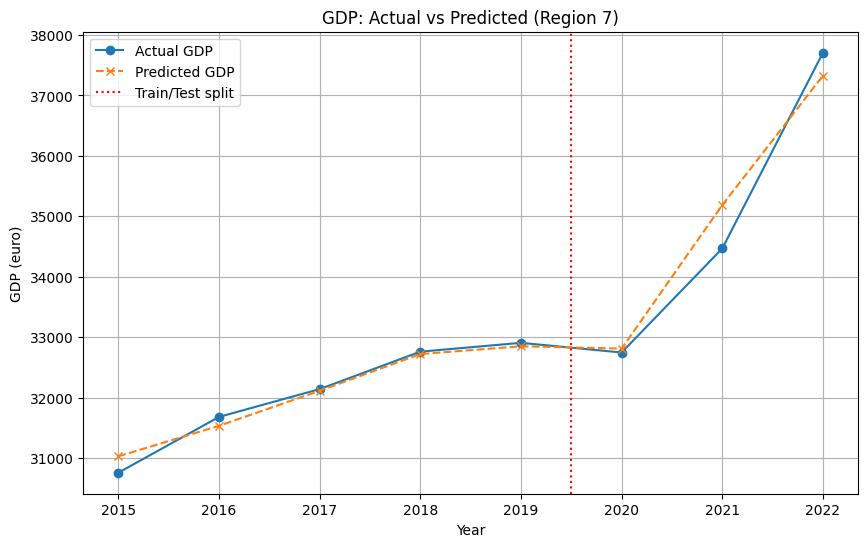


Region 8
cols_features = [
    "Gross value added (millions of euro), F Construction (41-43)",
    "Gross value added (millions of euro), G Wholesale and retail trade; repair of motor vehicles and motorcycles (45-47)",
    "Gross value added (millions of euro), O Public administration and defence; compulsory social security (84)",
    "Gross value added (millions of euro), P Education (85)",
    "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
    "Gross value added (millions of euro), A Agriculture, forestry and fishing (01-03)",
    "Exports (euro)",
    "Inhabitants, total (PT)",
]
Region 8 - Train R²: 0.9953883251312525
Region 8 - Test  R²: 0.9960904613344467


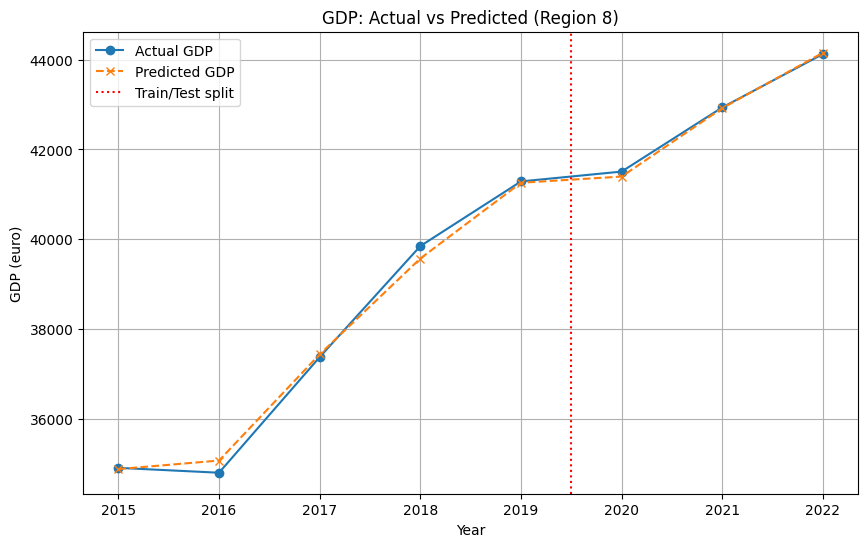


Region 9
cols_features = [
    "Gross value added (millions of euro), P Education (85)",
    "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
    "Exports (euro)",
    "Employed (PT)",
    "Inhabitants, total (PT)",
    "Disposable income, net",
]
Region 9 - Train R²: 0.9598842280146557
Region 9 - Test  R²: 0.9850126124572546


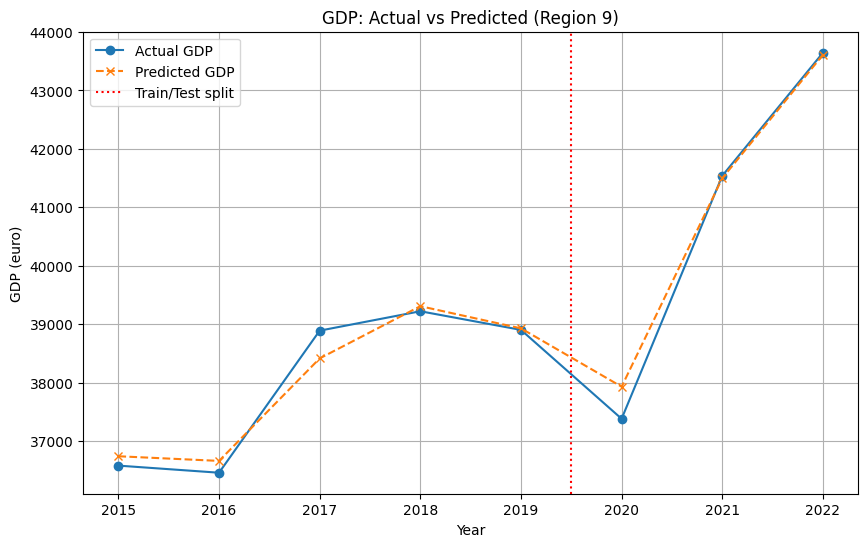


Region 10
cols_features = [
    "Gross value added (millions of euro), H Transportation and storage (49-53)",
    "Gross value added (millions of euro), O Public administration and defence; compulsory social security (84)",
    "Gross value added (millions of euro), P Education (85)",
    "Imports (euro)",
    "Disposable income, net",
    "Wages and salaries received, income",
]
Region 10 - Train R²: 0.9878402755635636
Region 10 - Test  R²: 0.9377678264231473


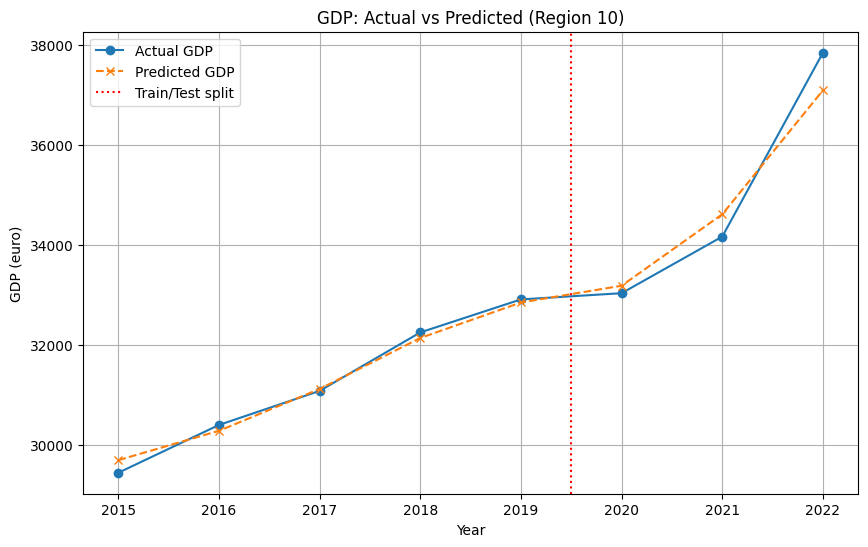


Region 11
cols_features = [
    "Gross value added (millions of euro), G Wholesale and retail trade; repair of motor vehicles and motorcycles (45-47)",
    "Gross value added (millions of euro), H Transportation and storage (49-53)",
    "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
    "Gross value added (millions of euro), A Agriculture, forestry and fishing (01-03)",
    "Exports (euro)",
    "Disposable income, net",
]
Region 11 - Train R²: 0.9974001133284031
Region 11 - Test  R²: 0.9985902055090298


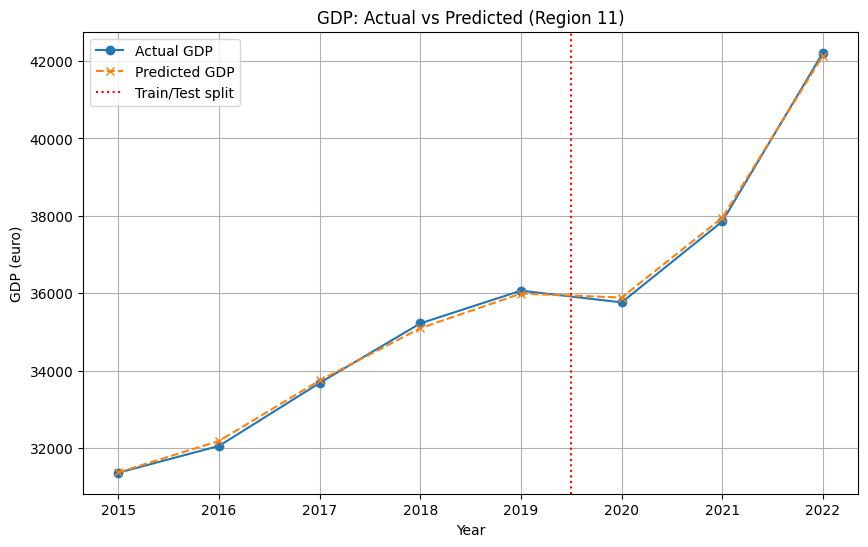


Region 12
cols_features = [
    "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
    "Gross value added (millions of euro), A Agriculture, forestry and fishing (01-03)",
    "Exports (euro)",
    "Employed (PT)",
    "Disposable income, net",
]
Region 12 - Train R²: 0.9940671578670807
Region 12 - Test  R²: 0.995686832121165


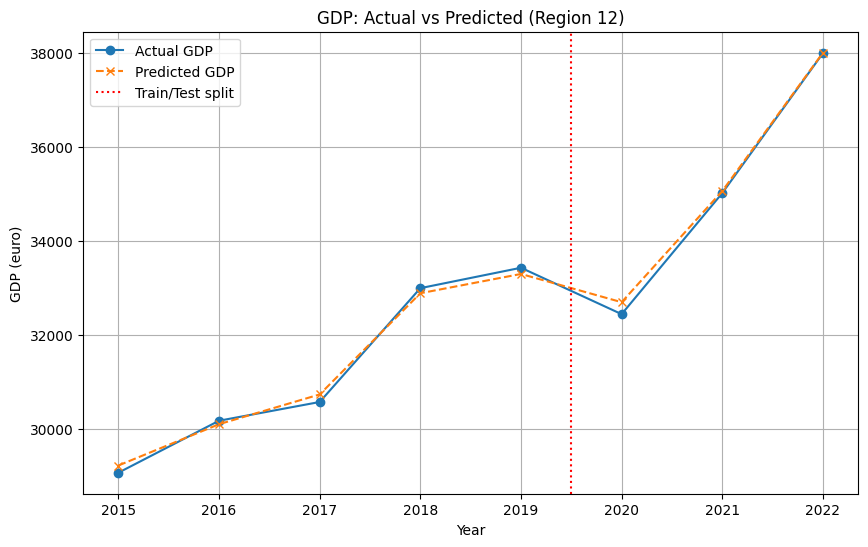


Region 13
cols_features = [
    "Gross value added (millions of euro), G Wholesale and retail trade; repair of motor vehicles and motorcycles (45-47)",
    "Gross value added (millions of euro), O Public administration and defence; compulsory social security (84)",
    "Gross value added (millions of euro), P Education (85)",
    "Exports (euro)",
    "Employed (PT)",
]
Region 13 - Train R²: 0.9857276593402828
Region 13 - Test  R²: 0.9649449327208841


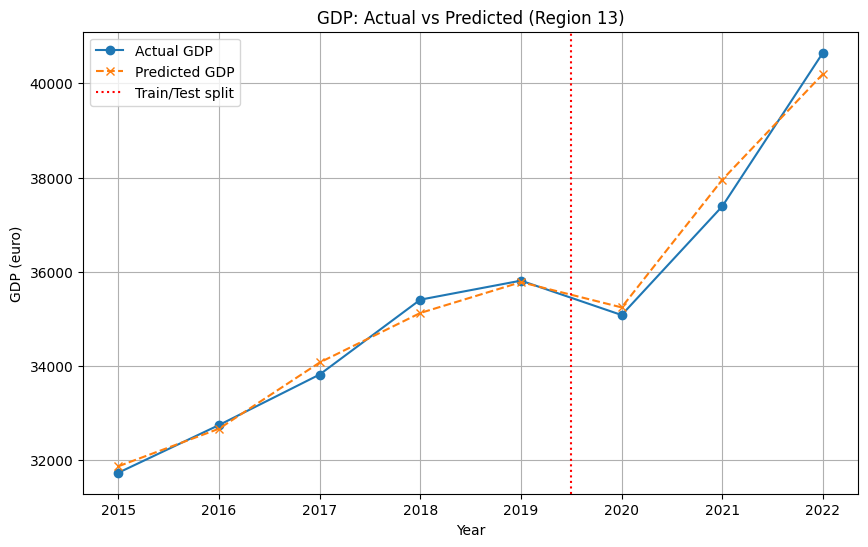


Region 14
cols_features = [
    "Gross value added (millions of euro), F Construction (41-43)",
    "Gross value added (millions of euro), H Transportation and storage (49-53)",
    "Gross value added (millions of euro), P Education (85)",
    "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
    "Gross value added (millions of euro), A Agriculture, forestry and fishing (01-03)",
    "Imports (euro)",
    "Exports (euro)",
]
Region 14 - Train R²: 0.9927284336304819
Region 14 - Test  R²: 0.9985443609336027


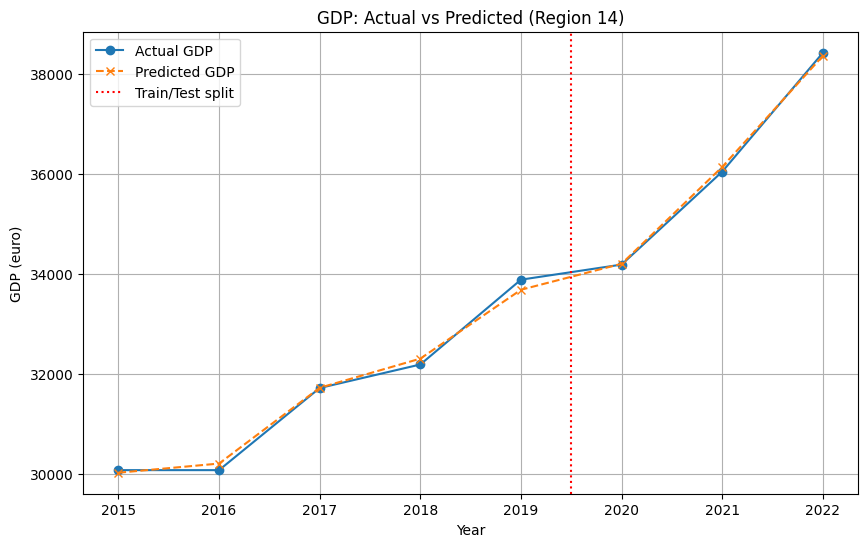


Region 15
cols_features = [
    "Gross value added (millions of euro), H Transportation and storage (49-53)",
    "Gross value added (millions of euro), P Education (85)",
    "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
    "Exports (euro)",
    "Employed (PT)",
    "Disposable income, net",
]
Region 15 - Train R²: 0.9976549329238883
Region 15 - Test  R²: 0.9954806849217699


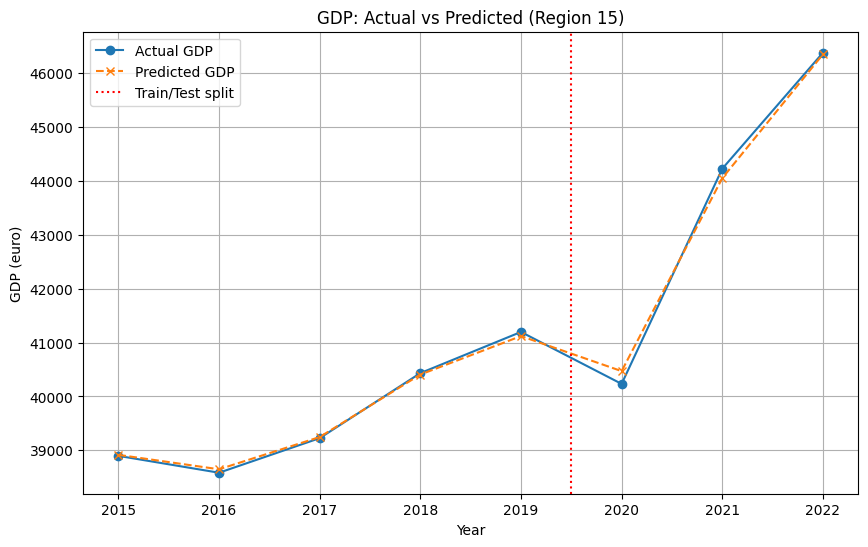


Region 16
cols_features = [
    "Gross value added (millions of euro), F Construction (41-43)",
    "Gross value added (millions of euro), H Transportation and storage (49-53)",
    "Gross value added (millions of euro), O Public administration and defence; compulsory social security (84)",
    "Gross value added (millions of euro), P Education (85)",
    "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
    "Employed (PT)",
    "Inhabitants, total (PT)",
    "Disposable income, net",
]
Region 16 - Train R²: 0.9397828233761962
Region 16 - Test  R²: 0.9165205787724993


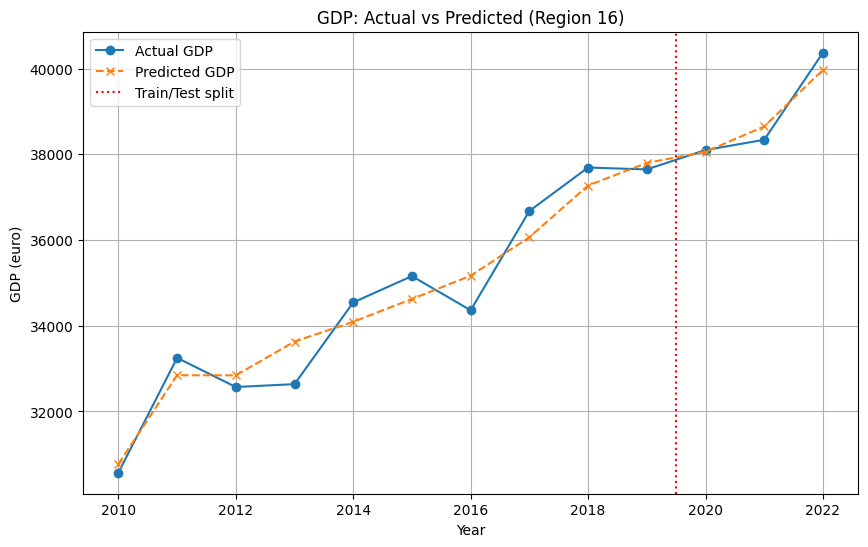


Region 17
cols_features = [
    "Exports (euro)",
    "Gross value added (millions of euro), G Wholesale and retail trade; repair of motor vehicles and motorcycles (45-47)",
    "Gross value added (millions of euro), K Financial and insurance activities (64-66)",
    "Employed (PT)",
    "Disposable income, net",
]
Region 17 - Train R²: 0.9232603760024878
Region 17 - Test  R²: 0.9722107282845613


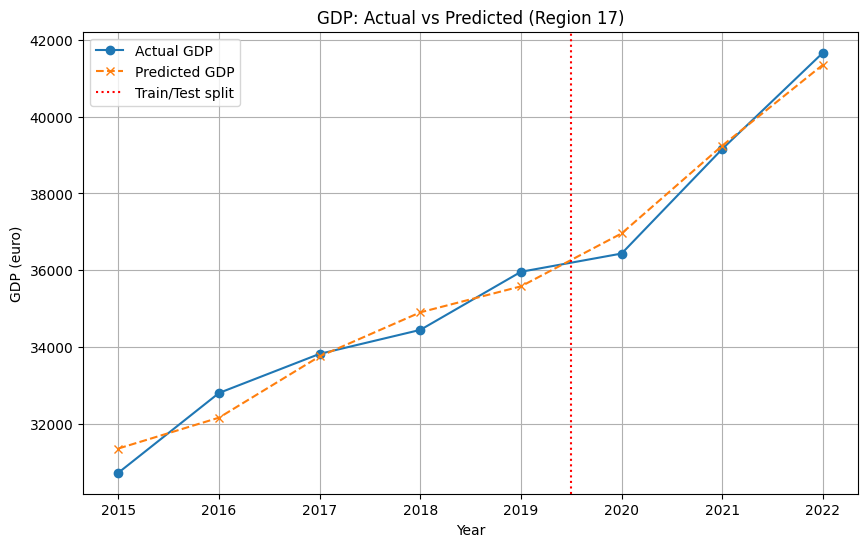


Region 18
cols_features = [
    "Gross value added (millions of euro), H Transportation and storage (49-53)",
    "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
    "Gross value added (millions of euro), A Agriculture, forestry and fishing (01-03)",
    "Imports (euro)",
    "Exports (euro)",
]
Region 18 - Train R²: 0.9789865094701393
Region 18 - Test  R²: 0.821969607816436


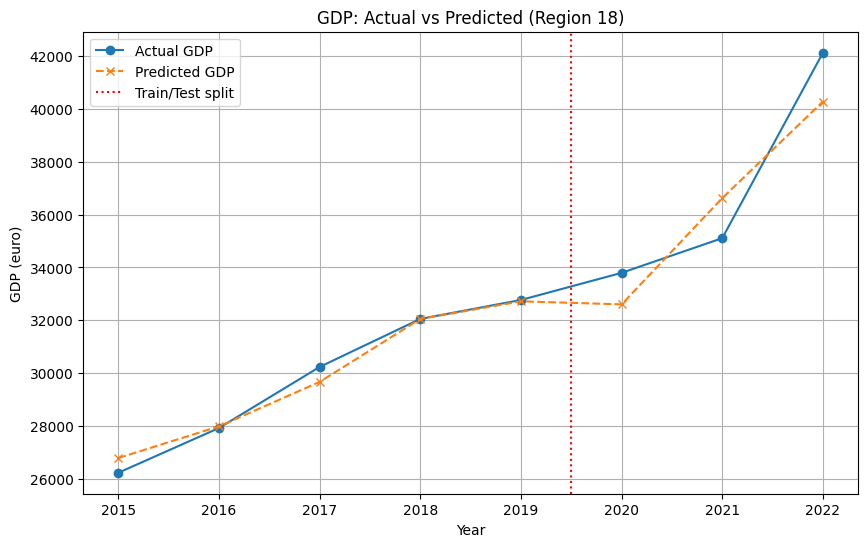


Region 19
cols_features = [
    "Gross value added (millions of euro), F Construction (41-43)",
    "Gross value added (millions of euro), G Wholesale and retail trade; repair of motor vehicles and motorcycles (45-47)",
    "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
    "Wages and salaries received, income",
]
Region 19 - Train R²: 0.9694541247738281
Region 19 - Test  R²: 0.6582148030037386


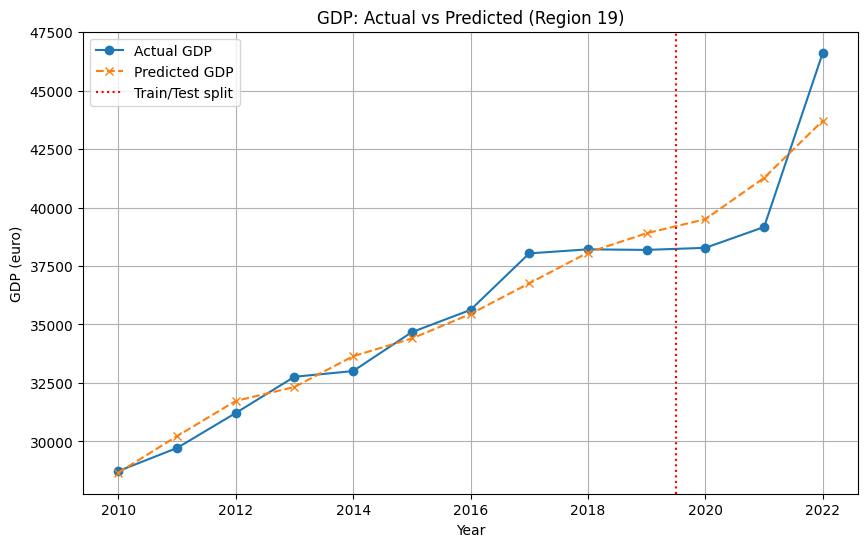


Region 21
cols_features = [
    "Exports (euro)",
    "Gross value added (millions of euro), G Wholesale and retail trade; repair of motor vehicles and motorcycles (45-47)",
    "Gross value added (millions of euro), H Transportation and storage (49-53)",
    "Gross value added (millions of euro), K Financial and insurance activities (64-66)",
    "Wages and salaries received, income",
]
Region 21 - Train R²: 0.9555819033195135
Region 21 - Test  R²: 0.9920250806470857


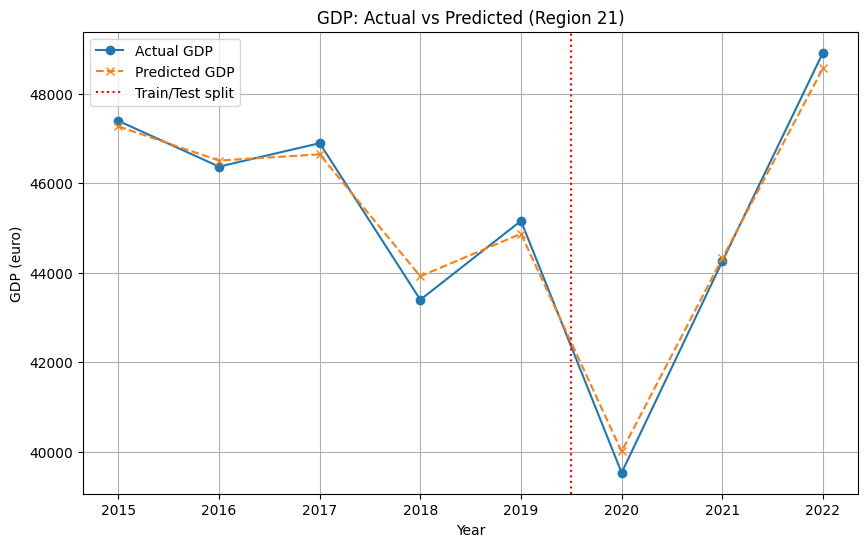

In [4]:
for region in sorted(region_features.keys()):
    cols_features = region_features[region]

    print(f"\nRegion {region}")
    print("cols_features = [")
    for f in cols_features:
        print(f'    "{f}",')
    print("]")

    df_region = df_total[df_total["Region"] == region]


    # drop missing values
    df_model = df_region[["Year"] + cols_features + [target_col]].dropna()

    #drop empty and with not enough data regions
    if len(df_model) < 4:
        continue

    #features, target, year
    X = df_model[cols_features].copy()
    y = df_model[target_col]
    years = df_model["Year"]

    #adding year as predictor (new column)
    X["Year"] = years

    #train/test split by year
    X_train = X.loc[years <= 2019]
    y_train = y.loc[years <= 2019]
    X_test  = X.loc[years >= 2020]
    y_test  = y.loc[years >= 2020]
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    #Ridge Regression (regularized LR)
    model = Ridge(alpha=1.0)
    model.fit(X_train_scaled, y_train)

    #predictions
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test  = model.predict(X_test_scaled)

    #predict on all data for plotting
    X_scaled_all = scaler.transform(X)
    y_pred_all = model.predict(X_scaled_all)
    
    results = pd.DataFrame({
        "Year": years,
        "Actual GDP": y,
        "Predicted GDP": y_pred_all
    }).sort_values("Year")
    
    print(f"Region {region} - Train R²:", model.score(X_train_scaled, y_train))
    print(f"Region {region} - Test  R²:", model.score(X_test_scaled, y_test))
    
    plt.figure(figsize=(10,6))
    plt.plot(results["Year"], results["Actual GDP"], label="Actual GDP", marker="o")
    plt.plot(results["Year"], results["Predicted GDP"], label="Predicted GDP", marker="x", linestyle="--")
    plt.axvline(2019.5, color="red", linestyle=":", label="Train/Test split")
    plt.xlabel("Year")
    plt.ylabel("GDP (euro)")
    plt.title(f"GDP: Actual vs Predicted (Region {region})")
    plt.legend()
    plt.grid(True)
    plt.show()